In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [ ]:
student = pd.read_csv('/content/student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
student.size

13035

In [ ]:
len(student)

395

In [ ]:
len(student.columns)

33

In [ ]:
print('Total number of students:',len(student))

Total number of students: 395


In [ ]:
student['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

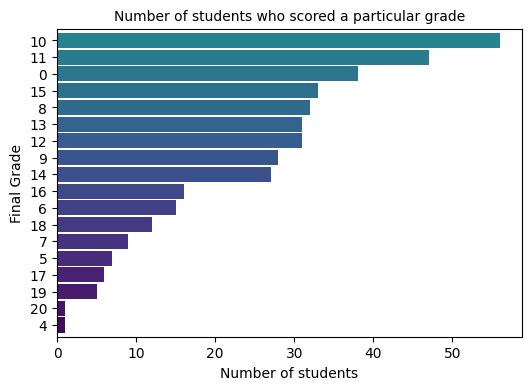

In [ ]:
plt.subplots(figsize=(6,4))
grade_counts = student['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('viridis',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=10)
grade_counts.set_xlabel('Number of students', fontsize=10)
grade_counts.set_ylabel('Final Grade', fontsize=10)
plt.show()

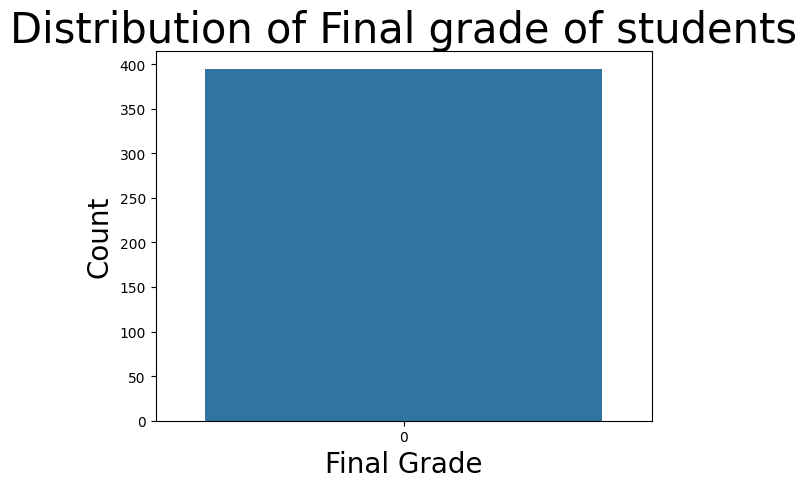

In [ ]:
b = sns.countplot(student['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [ ]:
student.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
male_studs = len(student[student['sex'] == 'M'])
female_studs = len(student[student['sex'] == 'F'])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


<ipython-input-70-343dffb1460f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  b = sns.kdeplot(student['age'], shade=True)


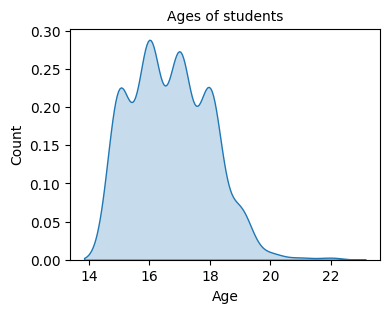

In [ ]:

plt.figure(figsize=(4, 3))
b = sns.kdeplot(student['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 10)
b.set_xlabel('Age', fontsize = 10)
b.set_ylabel('Count', fontsize = 10)
plt.show()

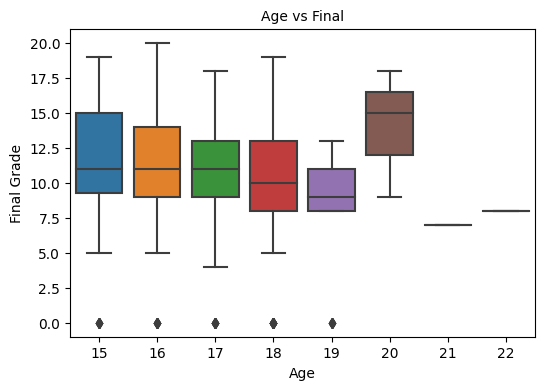

In [ ]:
plt.figure(figsize=(6, 4))
b = sns.boxplot(x='age', y='G3', data=student)
b.axes.set_title('Age vs Final', fontsize = 10)
b.set_xlabel('Age', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


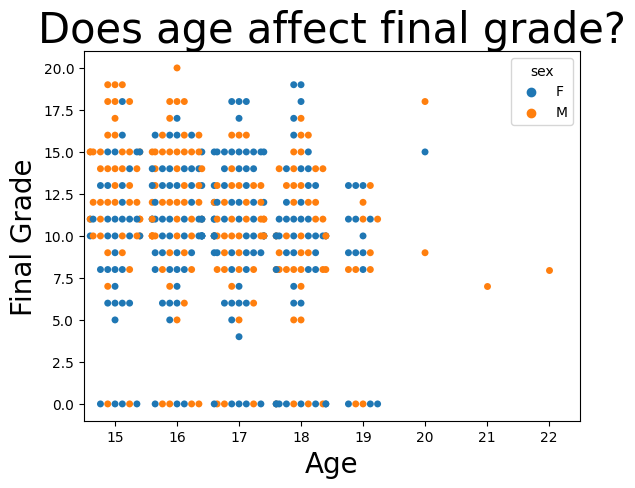

In [ ]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=student)
b.axes.set_title('Does age affect final grade?', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()


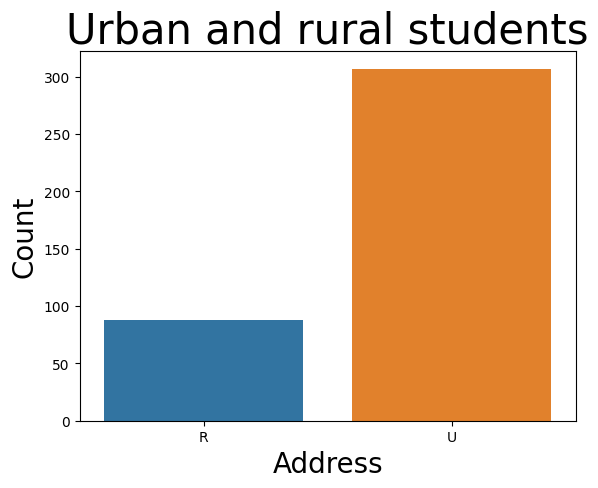

In [ ]:
# Convert 'address' column to categorical
student['address'] = student['address'].astype('category')

# Create the countplot
b = sns.countplot(x='address', data=student)
b.set_title('Urban and rural students', fontsize=30)
b.set_xlabel('Address', fontsize=20)
b.set_ylabel('Count', fontsize=20)
plt.show()


<ipython-input-74-cb2880b0590e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(student.loc[student['address'] == 'U', 'G3'], label='Urban', shade = True)
<ipython-input-74-cb2880b0590e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(student.loc[student['address'] == 'R', 'G3'], label='Rural', shade = True)


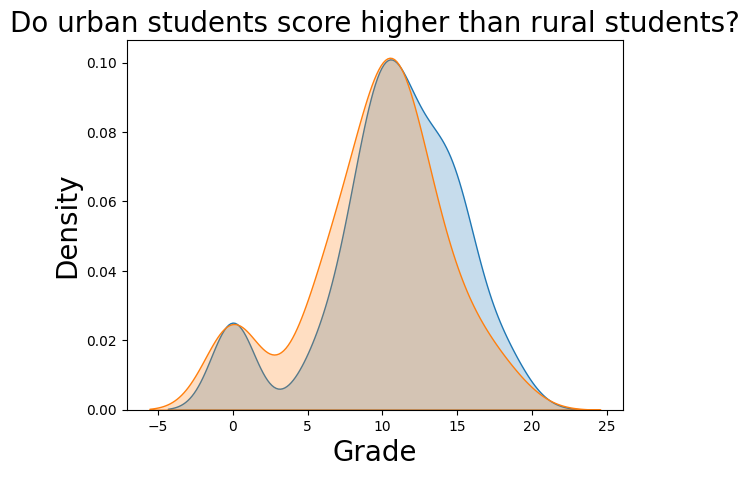

In [ ]:
# Grade distribution by address
sns.kdeplot(student.loc[student['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(student.loc[student['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


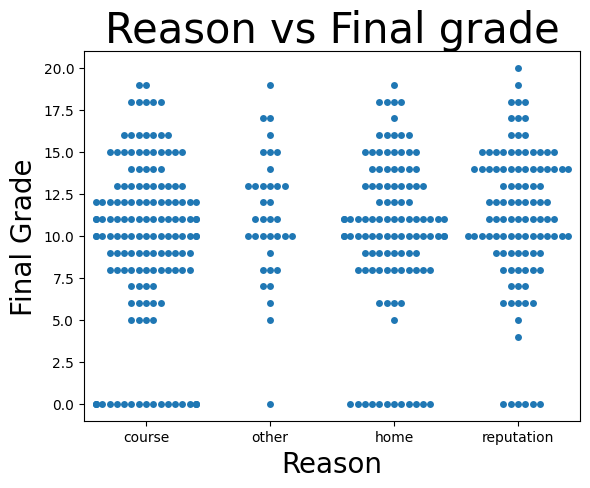

In [ ]:
b = sns.swarmplot(x='reason', y='G3', data=student)
b.axes.set_title('Reason vs Final grade', fontsize = 30)
b.set_xlabel('Reason', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [ ]:
student.corr()['G3'].sort_values()

<ipython-input-76-43763bb1ab4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  student.corr()['G3'].sort_values()


failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [ ]:
# Select only categorical variables
category_df = student.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['G3'] = student['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_no         0.082788
Fjob_teach

In [ ]:
# selecting the most correlated values and dropping the others
labels = student['G3']

# dropping the school and grade columns
student = student.drop(['school', 'G1', 'G2'], axis='columns')

# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)

In [ ]:
# Find correlations with the Grade
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [ ]:
student = student.loc[:, most_correlated.index]
student.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


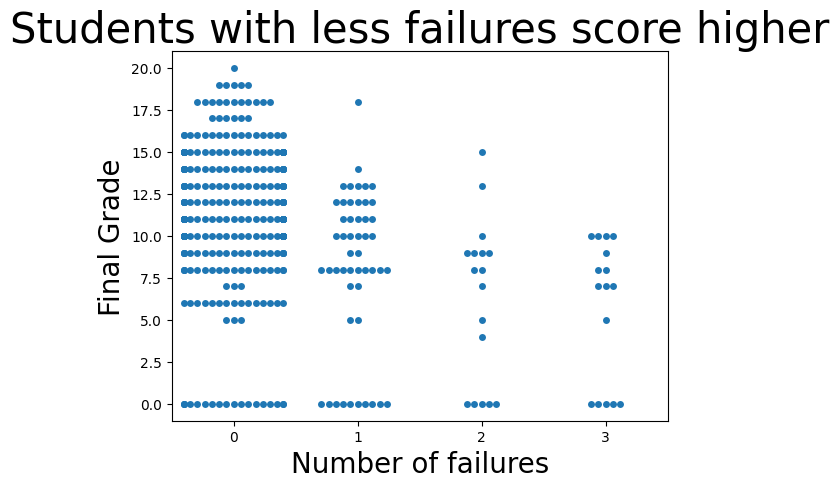

In [ ]:
b = sns.swarmplot(x=student['failures'],y=student['G3'])
b.axes.set_title('Students with less failures score higher', fontsize = 30)
b.set_xlabel('Number of failures', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

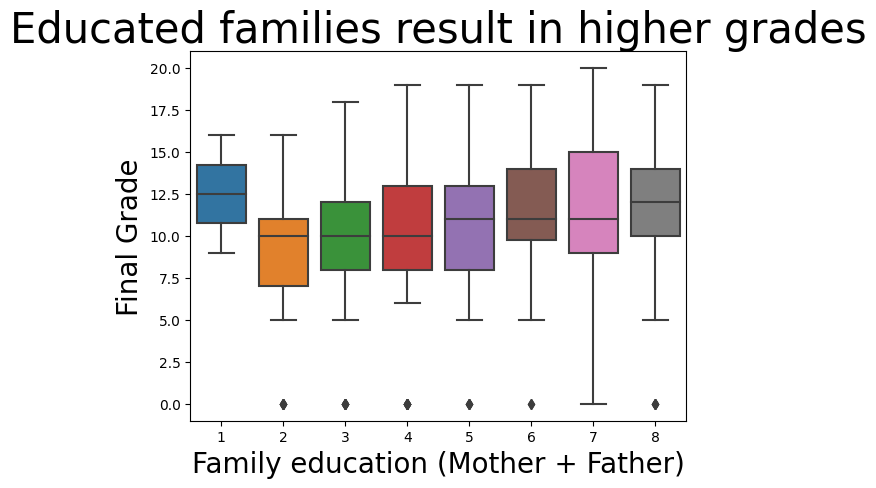

In [ ]:
family_ed = student['Fedu'] + student['Medu']
b = sns.boxplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; 

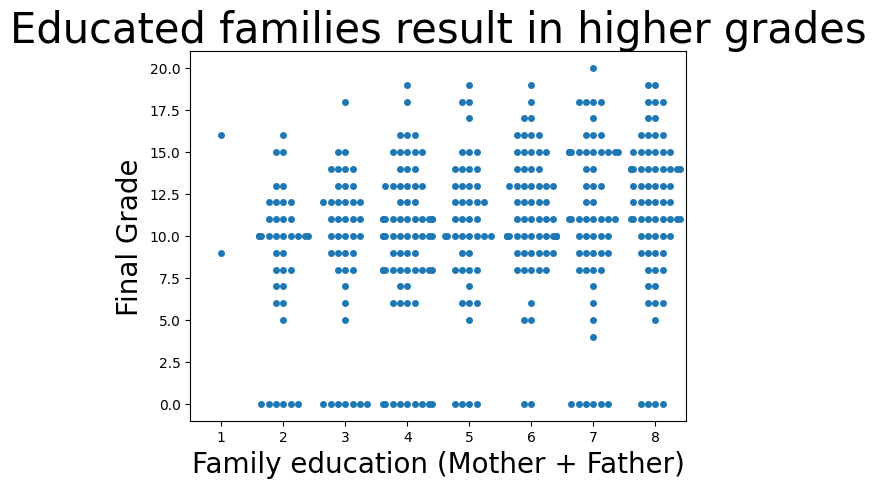

In [ ]:
b = sns.swarmplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [ ]:
student = student.drop('higher_no', axis='columns')
student.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout,romantic_no
0,6,0,4,1,18,4,4,1
1,6,0,1,1,17,1,3,1
2,10,3,1,1,15,1,2,1
3,15,0,4,1,15,2,2,0
4,10,0,3,1,16,3,2,1


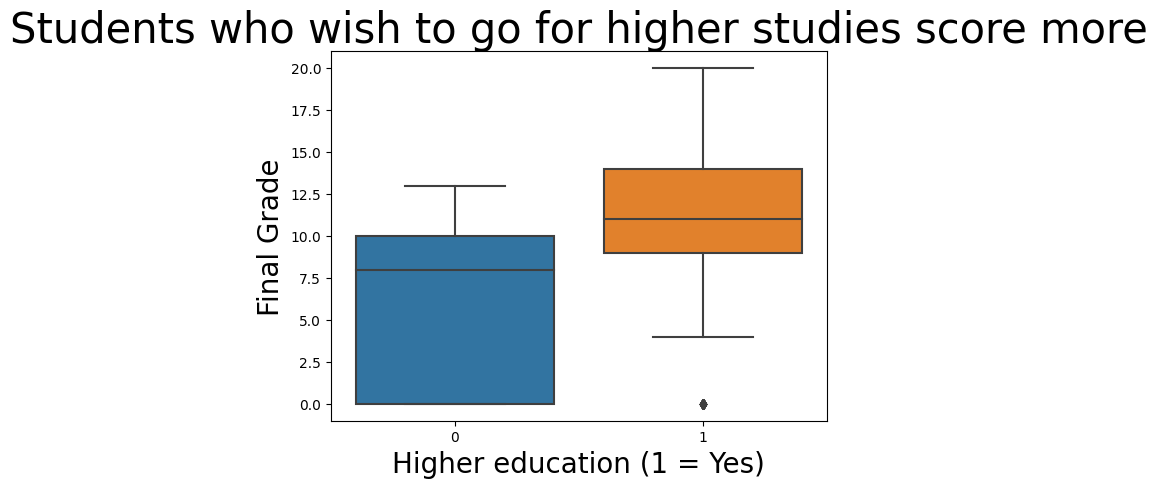

In [ ]:
b = sns.boxplot(x = student['higher_yes'], y=student['G3'])
b.axes.set_title('Students who wish to go for higher studies score more', fontsize = 30)
b.set_xlabel('Higher education (1 = Yes)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [ ]:
# List all column names in your dataset
print(student.columns)


Index(['G3', 'failures', 'Medu', 'higher_yes', 'age', 'Fedu', 'goout',
       'romantic_no'],
      dtype='object')


In [ ]:
# Display the first few rows of your dataset
print(student.head())


   G3  failures  Medu  higher_yes  age  Fedu  goout  romantic_no
0   6         0     4           1   18     4      4            1
1   6         0     1           1   17     1      3            1
2  10         3     1           1   15     1      2            1
3  15         0     4           1   15     2      2            0
4  10         0     3           1   16     3      2            1


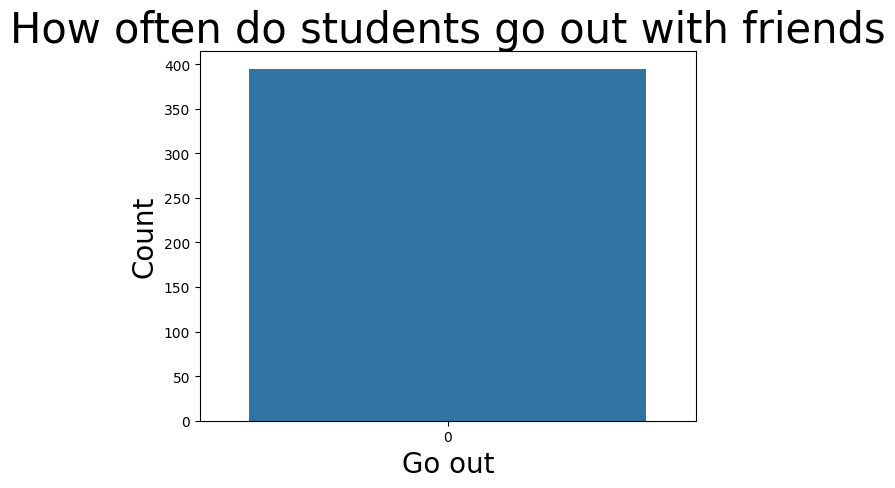

In [ ]:
b = sns.countplot(student['goout'])
b.axes.set_title('How often do students go out with friends', fontsize = 30)
b.set_xlabel('Go out', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


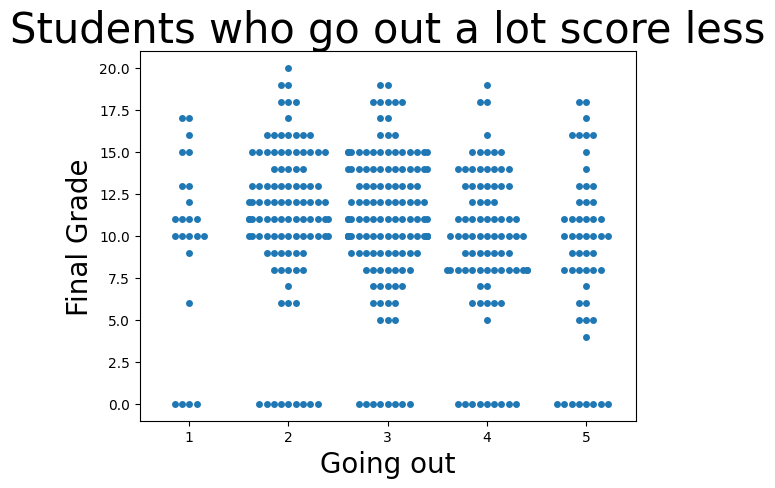

In [ ]:
b = sns.swarmplot(x=student['goout'],y=student['G3'])
b.axes.set_title('Students who go out a lot score less', fontsize = 30)
b.set_xlabel('Going out', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


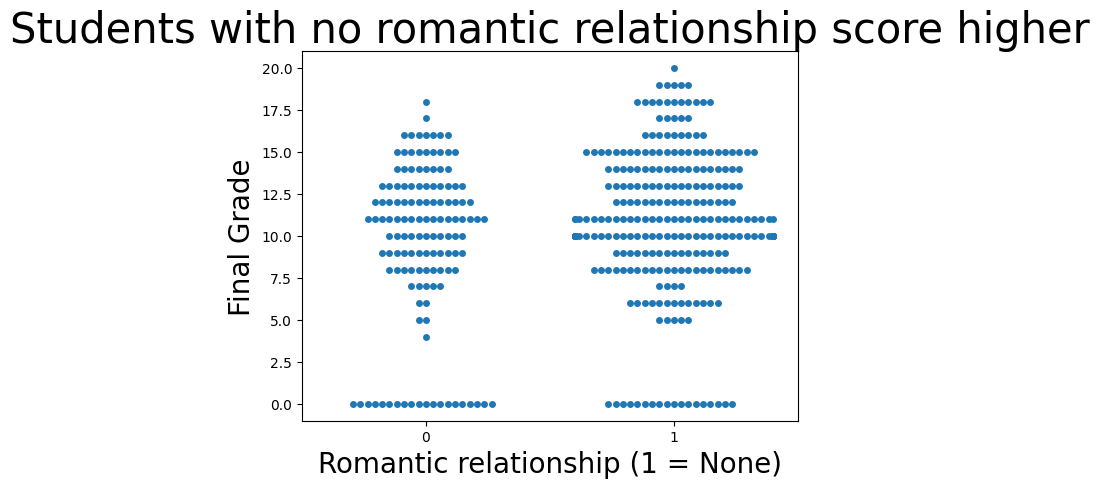

In [ ]:
b = sns.swarmplot(x=student['romantic_no'],y=student['G3'])
b.axes.set_title('Students with no romantic relationship score higher', fontsize = 30)
b.set_xlabel('Romantic relationship (1 = None)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [ ]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(student, labels, test_size = 0.25, random_state=42)

In [ ]:
X_train.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout,romantic_no
16,14,0,4,1,16,4,3,1
66,12,0,4,1,15,4,3,0
211,13,0,4,1,17,4,5,0
7,6,0,4,1,17,4,4,1
19,10,0,4,1,16,3,3,1


In [ ]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [ ]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [ ]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [ ]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = [
                      'Random Forest']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    # Instantiate the models

    model3 = RandomForestRegressor(n_estimators=100)


    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([ model3 ]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results

In [ ]:
'''
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)

    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results
    '''

"\n# Evaluate several ml models by training on training set and testing on testing set\ndef evaluate(X_train, X_test, y_train, y_test):\n    # Names of models\n    model_name_list = ['Linear Regression', 'ElasticNet Regression',\n                      'Random Forest', 'Extra Trees', 'SVM',\n                       'Gradient Boosted', 'Baseline']\n    X_train = X_train.drop('G3', axis='columns')\n    X_test = X_test.drop('G3', axis='columns')\n\n    # Instantiate the models\n    model1 = LinearRegression()\n    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)\n    model3 = RandomForestRegressor(n_estimators=100)\n    model4 = ExtraTreesRegressor(n_estimators=100)\n    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')\n    model6 = GradientBoostingRegressor(n_estimators=50)\n\n    # Dataframe for results\n    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)\n\n    # Train and predict with each model\n    for i, model in enumerate([model1, model2, model3, model4

In [ ]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Random Forest,3.699211,4.747539
Baseline,3.787879,4.825228


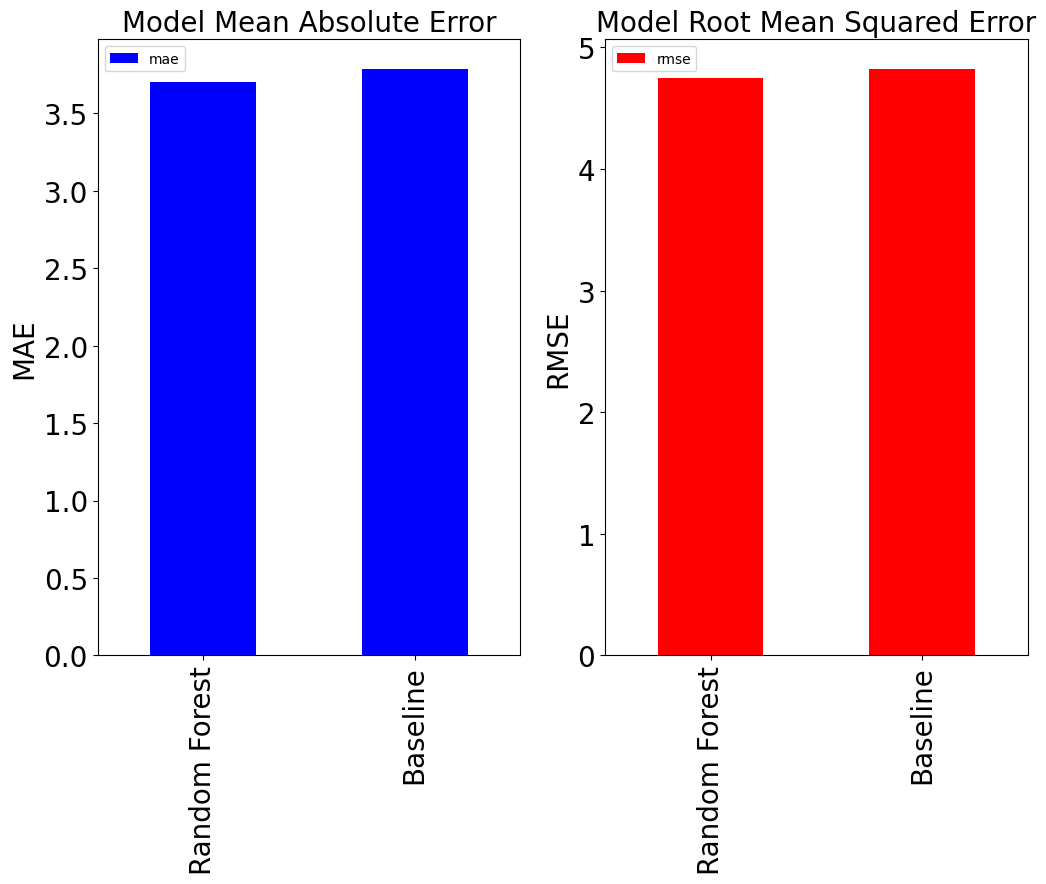

In [ ]:
plt.figure(figsize=(12, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20)
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20)
plt.ylabel('RMSE',fontsize=20)

plt.show()

In [ ]:
student['Achievement_Category'] = pd.cut(student['G3'], bins=[0, 8, 14, 20], labels=['Poor Achieving', 'Average Achieving', 'Well Achieving'])


In [ ]:
print(student.isna().sum())


G3                       0
failures                 0
Medu                     0
higher_yes               0
age                      0
Fedu                     0
goout                    0
romantic_no              0
Achievement_Category    38
dtype: int64


In [ ]:
student = student.fillna(student.mean())


<ipython-input-102-a51c0e0f82d1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  student = student.fillna(student.mean())


In [ ]:
# Drop rows with NaN values
student_cleaned = student.dropna()

# If you want to drop columns with NaN values, you can specify axis=1
# student_cleaned = student.dropna(axis=1)

# Now, you can use student_cleaned for your analysis


In [ ]:
if student.isna().any().any():
    print("Dataset contains NaN values. Handle missing values first.")
else:

    student = student.dropna()


Dataset contains NaN values. Handle missing values first.


In [ ]:
student_filled = student.fillna(student.mean())


<ipython-input-105-187da4647050>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  student_filled = student.fillna(student.mean())


In [ ]:
student = student.dropna(subset=['Achievement_Category'])


In [ ]:
student['Achievement_Category'] = student['Achievement_Category'].fillna('Default_Category')


<ipython-input-107-24adde6a85f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student['Achievement_Category'] = student['Achievement_Category'].fillna('Default_Category')


In [ ]:
student = student.fillna(student.mean(numeric_only=True))


In [ ]:
# Check if there are any non-float columns
non_float_columns = student.select_dtypes(exclude=['float']).columns
if not non_float_columns.empty:
    # If there are non-float columns, you might want to handle them differently
    print(f"Non-float columns found: {non_float_columns}")
else:
    # Fill NaN values with the mean of each column for float columns
    student = student.fillna(student.mean(numeric_only=True))


Non-float columns found: Index(['G3', 'failures', 'Medu', 'higher_yes', 'age', 'Fedu', 'goout',
       'romantic_no', 'Achievement_Category'],
      dtype='object')


In [ ]:
# Separate numeric and non-numeric columns
numeric_columns = student.select_dtypes(include=['float']).columns
non_numeric_columns = student.select_dtypes(exclude=['float']).columns

# Fill NaN values with mean for numeric columns
student[numeric_columns] = student[numeric_columns].fillna(student[numeric_columns].mean())

# Fill NaN values with 'Unknown' for non-numeric columns
student[non_numeric_columns] = student[non_numeric_columns].fillna('Unknown')


In [ ]:

# Fill NaN values with mean for numeric columns
student[numeric_columns] = student[numeric_columns].fillna(student[numeric_columns].mean())

# Fill NaN values with 'Unknown' for non-numeric columns
student[non_numeric_columns] = student[non_numeric_columns].fillna('Unknown')

# Check for NaN values after filling
nan_counts = student.isna().sum()
print(nan_counts)


G3                      0
failures                0
Medu                    0
higher_yes              0
age                     0
Fedu                    0
goout                   0
romantic_no             0
Achievement_Category    0
dtype: int64


In [ ]:
X = student.drop(['G3',  'Achievement_Category'], axis='columns')  # Features
y = student['Achievement_Category']  # Target variable (categorical)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

# Classification report provides precision, recall, F1-score for each class
classification_rep = classification_report(y_test, y_pred)

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_rep)

print("Confusion Matrix:")
print(confusion_mat)

print("Accuracy:", accuracy)

# Feature importances
feature_importances = model.feature_importances_


Classification Report:
                   precision    recall  f1-score   support

Average Achieving       0.70      0.88      0.78        57
   Poor Achieving       0.29      0.12      0.17        16
   Well Achieving       0.50      0.35      0.41        17

         accuracy                           0.64        90
        macro avg       0.50      0.45      0.46        90
     weighted avg       0.59      0.64      0.60        90

Confusion Matrix:
[[50  3  4]
 [12  2  2]
 [ 9  2  6]]
Accuracy: 0.6444444444444445
